In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn import preprocessing, tree
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import kagglehub
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


# **Load data**

In [ ]:
downlod_data = kagglehub.dataset_download('sameepvani/nasa-nearest-earth-objects')
read_data = pd.read_csv("/root/.cache/kagglehub/datasets/sameepvani/nasa-nearest-earth-objects/versions/2/neo.csv")
data = pd.DataFrame(read_data)
data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [ ]:
data.drop(['id' , 'name'], axis= 1, inplace=True)

# **Encoder**

In [ ]:
for column in ['orbiting_body', 'sentry_object', 'hazardous']:
    data[column] = pd.Categorical(data[column]).codes

# **Balance target**

In [ ]:
smote = SMOTE()
data_balance, target_balance = smote.fit_resample(data,data['hazardous'])
data_balance['hazardous'] = target_balance

In [ ]:
data_analyses , test_data = train_test_split(data_balance , test_size = 0.2)

# **Check data**

In [ ]:
data_analyses.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
count,131193.000000,131193.000000,131193.000000,1.311930e+05,131193.0,131193.0,131193.000000,131193.000000
mean,0.200489,0.448307,54156.008791,3.834900e+07,0.0,0.0,22.098257,0.500057
std,0.291638,0.652121,25325.142625,2.187692e+07,0.0,0.0,2.780911,0.500002
min,0.000609,0.001362,203.346433,6.745533e+03,0.0,0.0,9.230000,0.000000
25%,0.040230,0.089958,35330.244802,1.924055e+07,0.0,0.0,20.202058,0.000000
50%,0.147850,0.330603,51218.873816,3.927795e+07,0.0,0.0,21.300000,1.000000
75%,0.252998,0.565721,69231.831953,5.753299e+07,0.0,0.0,24.100000,1.000000
max,37.892650,84.730541,236990.128088,7.479865e+07,0.0,0.0,33.200000,1.000000


In [ ]:
data_analyses.drop(['sentry_object', 'orbiting_body'] , axis = 1 , inplace = True)

# **Copy data to remove noise**

In [ ]:
data_noise = data_analyses

In [ ]:
lowoutliers  = data_analyses.absolute_magnitude.quantile(0.75) + (data_analyses.absolute_magnitude.quantile(0.75) - data_analyses.absolute_magnitude.quantile(0.25)) * 1.5
highoutliers = data_analyses.absolute_magnitude.quantile(0.25) - (data_analyses.absolute_magnitude.quantile(0.75) - data_analyses.absolute_magnitude.quantile(0.25)) * 1.5

<ipython-input-189-ab3f9dd50bc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.absolute_magnitude, palette=['#900C3F'], ax = ax2)


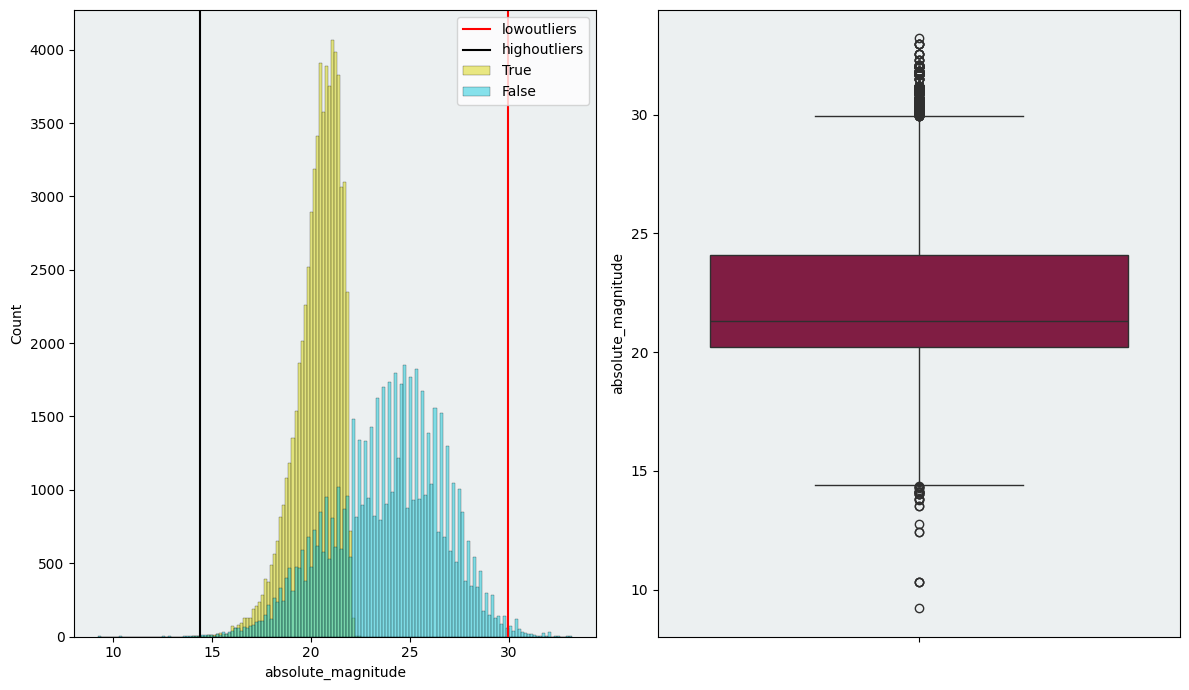

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'absolute_magnitude' , hue = 'hazardous', palette=['#13c9db', '#d8d508'], ax = ax1)
plt.gca().set_facecolor('#f0f0f0')
ax1.axvline(x = lowoutliers, color='red')
ax1.axvline(x = highoutliers, color='black')
sns.boxplot(data_analyses.absolute_magnitude, palette=['#900C3F'], ax = ax2)
ax1.legend(['lowoutliers', 'highoutliers', 'True' , 'False'])
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.tight_layout()
plt.show()

In [ ]:
data_noise = data_noise[data_noise['absolute_magnitude']<= lowoutliers]
data_noise = data_noise[data_noise['absolute_magnitude']>= highoutliers]

<ipython-input-191-a3e1c7c89281>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.miss_distance, palette=['#900C3F'], ax = ax2)


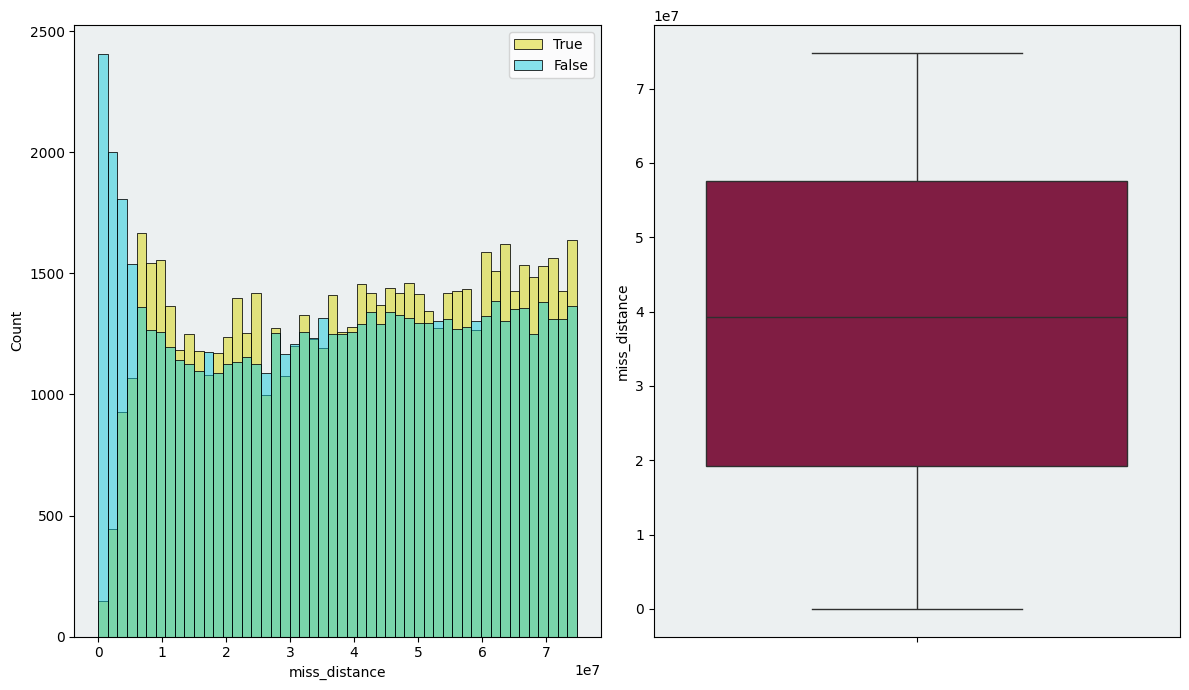

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'miss_distance' , hue = 'hazardous', palette=['#13c9db', '#d8d508'], ax = ax1)
sns.boxplot(data_analyses.miss_distance, palette=['#900C3F'], ax = ax2)
ax1.legend(['True' , 'False'])
plt.gca().set_facecolor('#ecf0f1')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
lowoutliers2  = data_analyses.relative_velocity.quantile(0.75) + (data_analyses.relative_velocity.quantile(0.75) - data_analyses.relative_velocity.quantile(0.25)) * 1.5

<ipython-input-193-53c861dbd050>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.relative_velocity, palette=['#900C3F'], ax = ax2)


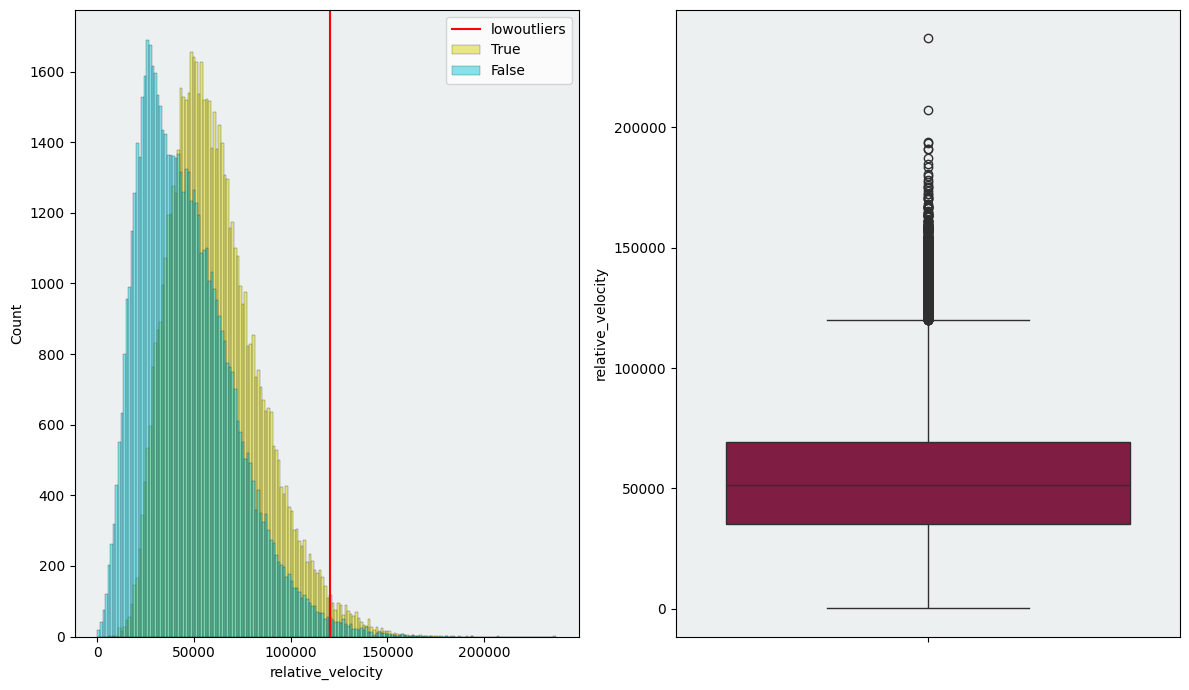

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'relative_velocity', palette=['#13c9db', '#d8d508'], hue = 'hazardous' , ax = ax1)
ax1.axvline(x = lowoutliers2, color='red')
sns.boxplot(data_analyses.relative_velocity, palette=['#900C3F'], ax = ax2)
ax1.legend(['lowoutliers', 'True' , 'False'])
plt.gca().set_facecolor('#ecf0f1')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
data_noise = data_noise[data_noise['relative_velocity']<= lowoutliers2]

In [ ]:
lowoutliers3  = data_analyses.est_diameter_max.quantile(0.75) + (data_analyses.est_diameter_max.quantile(0.75) - data_analyses.est_diameter_max.quantile(0.25)) * 1.5

<ipython-input-196-2da46d5ec1e7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.est_diameter_max, palette=['#900C3F'], ax = ax2)


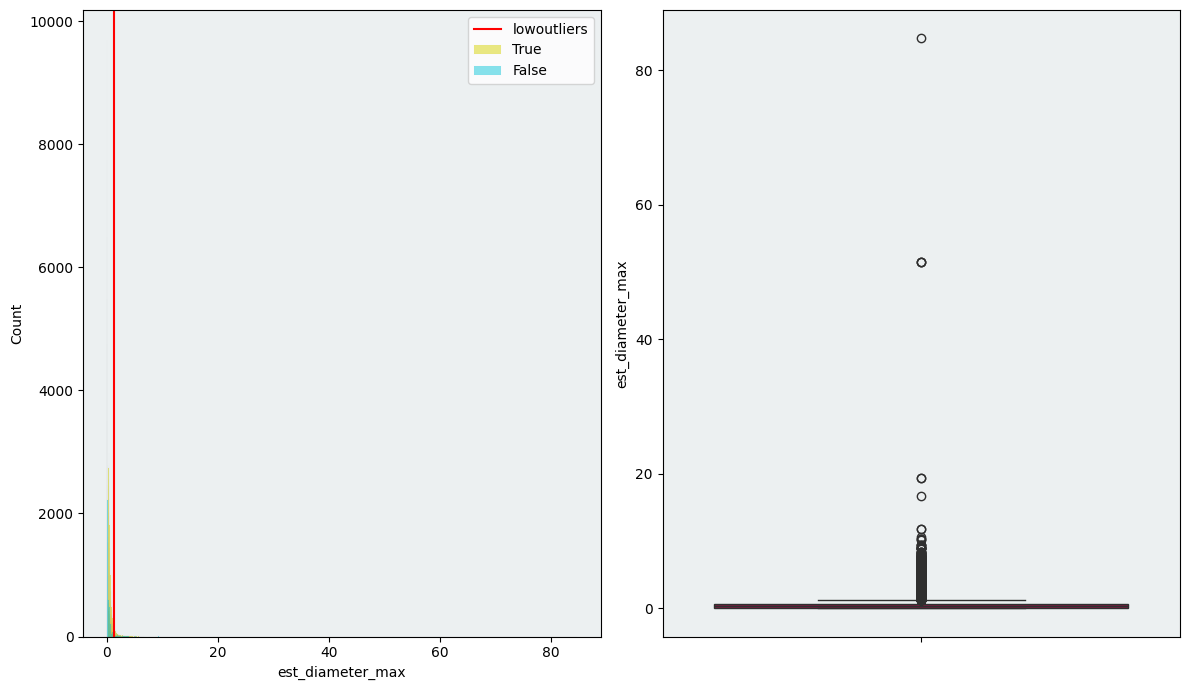

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'est_diameter_max' , hue = 'hazardous', palette=['#13c9db', '#d8d508'], ax = ax1)
ax1.axvline(x = lowoutliers3, color='red')
sns.boxplot(data_analyses.est_diameter_max, palette=['#900C3F'], ax = ax2)
ax1.legend(['lowoutliers', 'True' , 'False'])
plt.gca().set_facecolor('#ecf0f1')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
data_noise = data_noise[data_noise['est_diameter_max']<= lowoutliers3]

In [ ]:
lowoutliers4  = data_analyses.est_diameter_min.quantile(0.75) + (data_analyses.est_diameter_min.quantile(0.75) - data_analyses.est_diameter_min.quantile(0.25)) * 1.5

<ipython-input-199-88380dfe2ddd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_analyses.est_diameter_min, palette=['#900C3F'], ax = ax2)


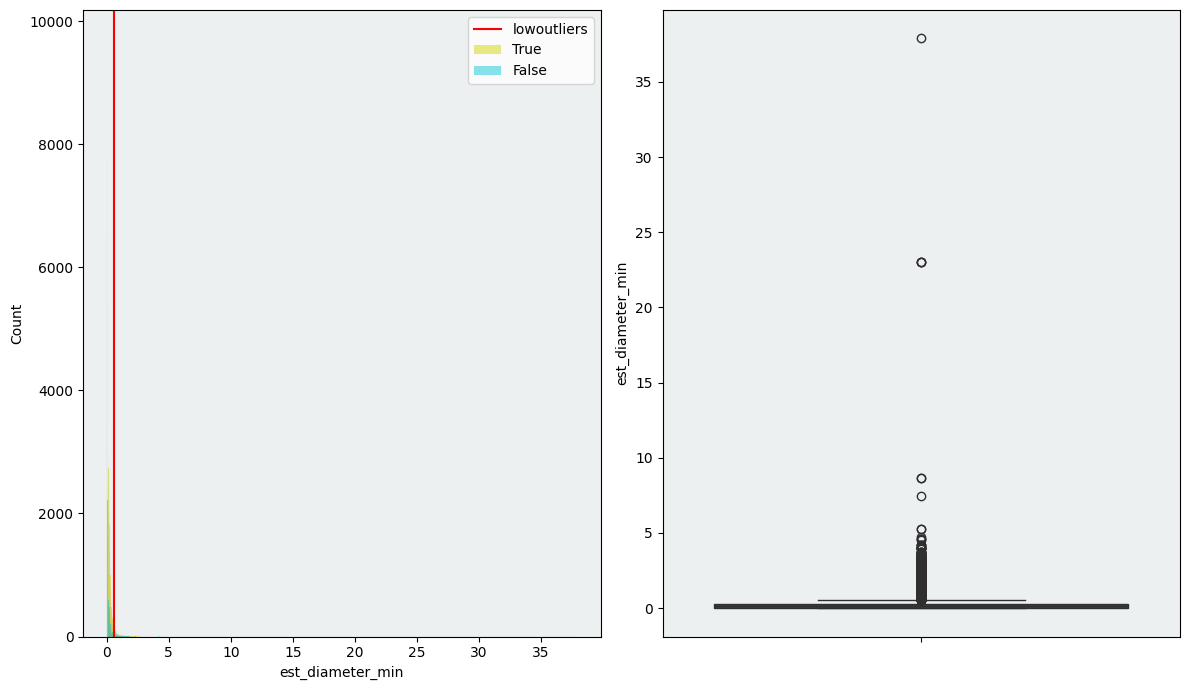

In [ ]:
fig , [ax1 , ax2] = plt.subplots(nrows = 1 , ncols = 2, figsize=(12, 7))
sns.histplot(data_analyses , x = 'est_diameter_min' , hue = 'hazardous', palette=['#13c9db', '#d8d508'], ax = ax1)
ax1.axvline(x = lowoutliers4, color='red')
sns.boxplot(data_analyses.est_diameter_min, palette=['#900C3F'], ax = ax2)
ax1.legend(['lowoutliers', 'True' , 'False'])
plt.gca().set_facecolor('#ecf0f1')
plt.tight_layout()
ax1.set_facecolor('#ecf0f1')
ax2.set_facecolor('#ecf0f1')
plt.show()

In [ ]:
data_noise = data_noise[data_noise['est_diameter_min']<= lowoutliers4]

# **Pairplot for noise-free data**  ⏳


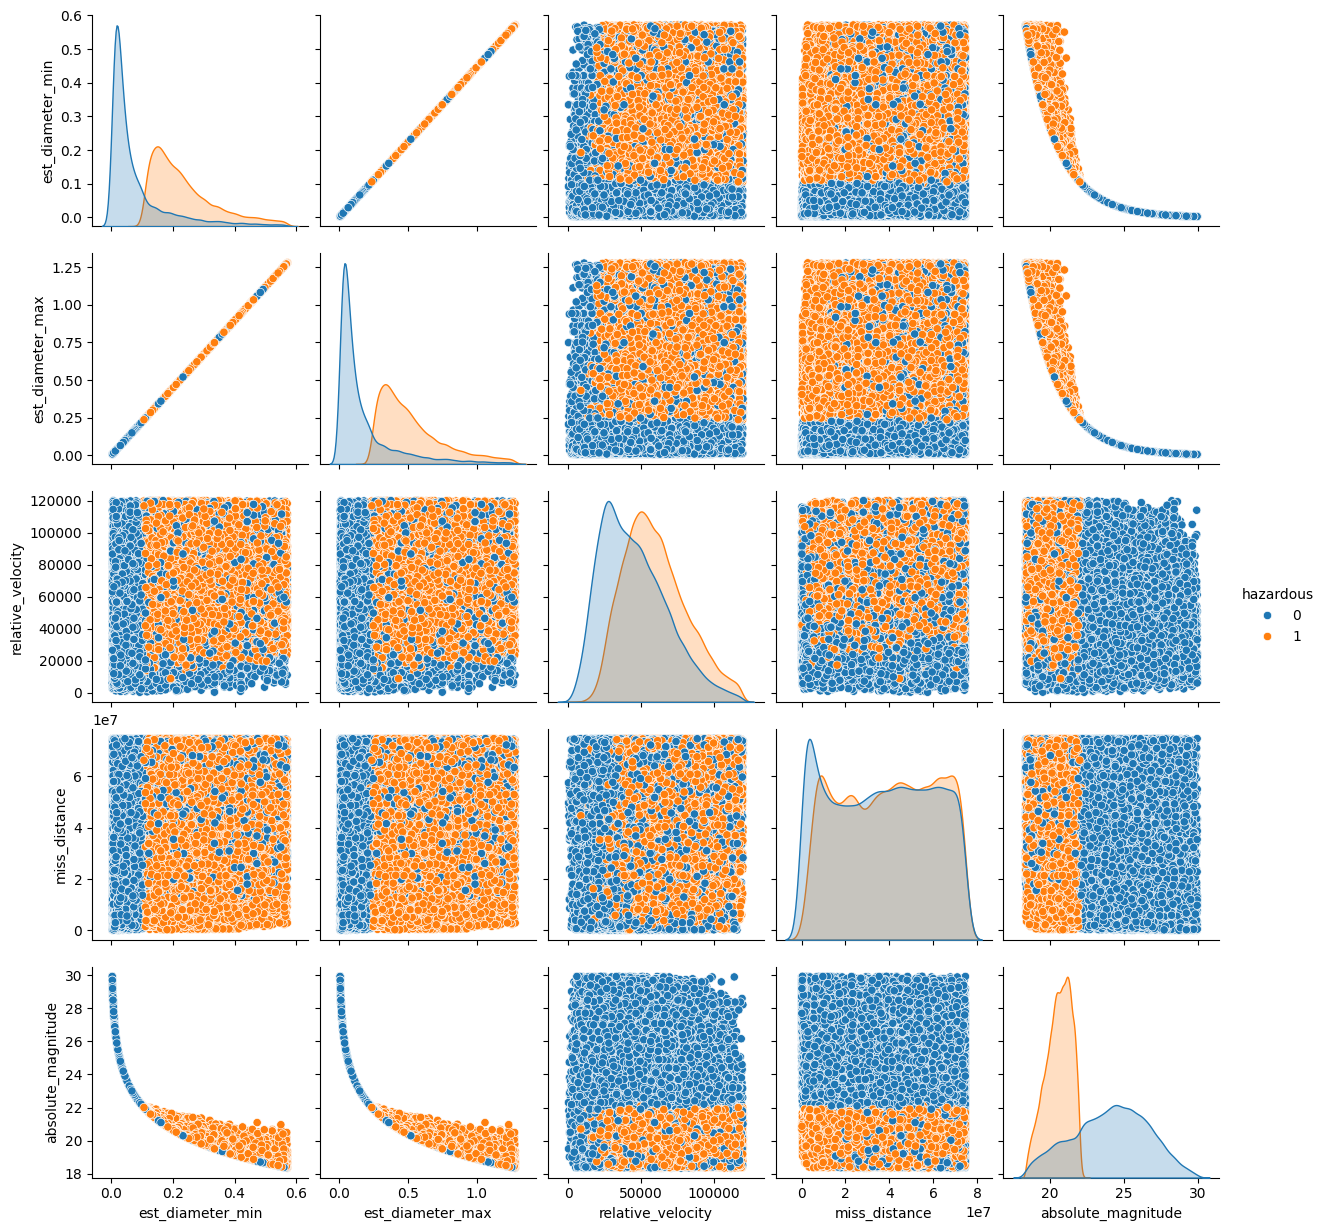

In [ ]:
sns.pairplot(data_noise , hue = 'hazardous')

# **Heat map**

<Axes: >

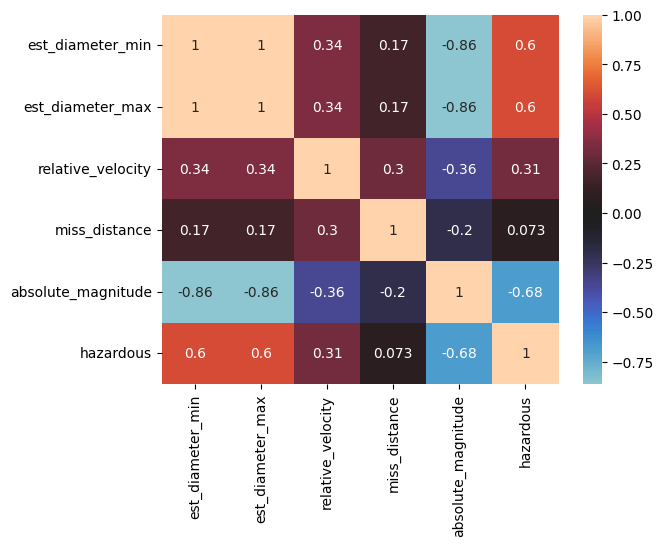

In [ ]:
sns.heatmap(data_noise.corr() , center = 0 , annot = True)

In [ ]:
data_noise.drop(['est_diameter_min'], axis=1, inplace=True)


# **Correlation of features**

In [ ]:
vifd = pd.DataFrame()
vifd['Feature'] = data_noise.columns
vifd['VIF'] = [variance_inflation_factor(data_noise.values, i) for i in range(data_noise.shape[1])]
display(vifd)

,Feature,VIF
0,est_diameter_max,4.033833
1,relative_velocity,7.410547
2,miss_distance,4.384040
3,absolute_magnitude,5.666895
4,hazardous,3.121945


# **Box plot based on classes**

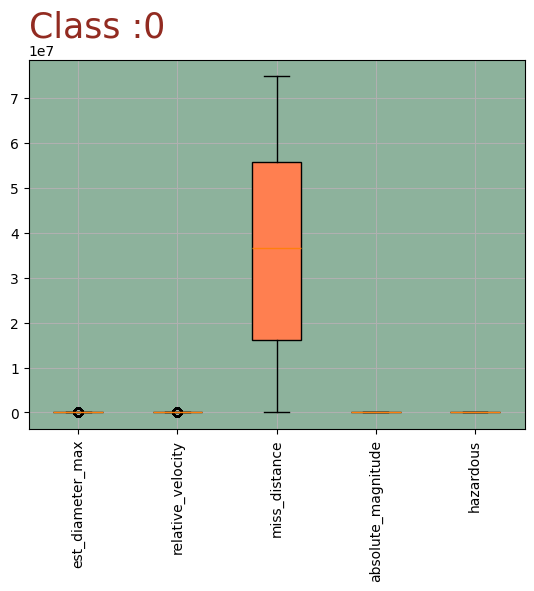

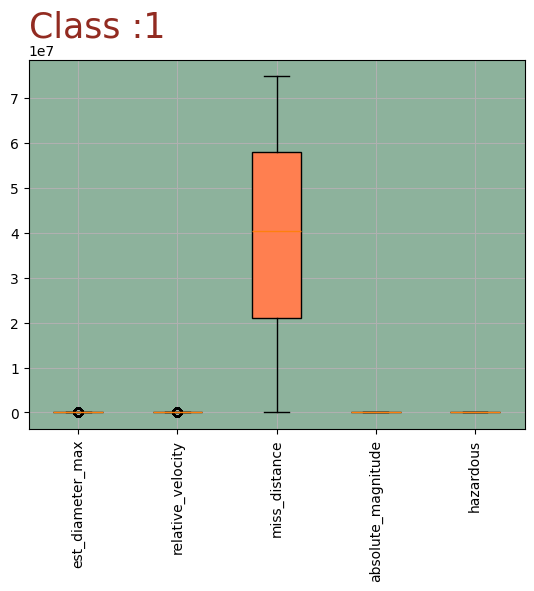

In [ ]:
groups = data_noise.groupby('hazardous')
for label, group in groups:
    box = plt.boxplot(group, patch_artist=True)
    colors = ['#229954', '#2e4053', '#FF7F50', '#c39bd3']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    plt.title('Class :'+ str(label), color= '#922b21', fontsize=25, loc='left')
    plt.xticks(rotation=90)
    plt.xticks([1, 2, 3, 4, 5], ['est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude', 'hazardous'])
    plt.gca().set_facecolor('#8db29c')
    plt.grid()
    plt.show()

In [ ]:
test_data.drop(['sentry_object', 'orbiting_body', 'est_diameter_min'] , axis = 1 , inplace = True)

# **train__teast**

In [ ]:
x_test, y_test = [test_data.drop(['hazardous', 'est_diameter_max', 'relative_velocity', 'miss_distance'],axis=1), test_data['hazardous']]
x_train, y_train = [data_noise.drop(['hazardous', 'est_diameter_max', 'relative_velocity', 'miss_distance'],axis=1), data_noise['hazardous']]

# **Algorithm KNN**

In [ ]:
modelKnn= KNeighborsClassifier(n_neighbors= 4)
modelKnn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred_knn = modelKnn.predict(x_test)

# **Check model Knn**

In [ ]:
print(metrics.accuracy_score(y_test,y_pred_knn))

0.910485075764505


In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     16407
           1       0.98      0.84      0.90     16392

    accuracy                           0.91     32799
   macro avg       0.92      0.91      0.91     32799
weighted avg       0.92      0.91      0.91     32799



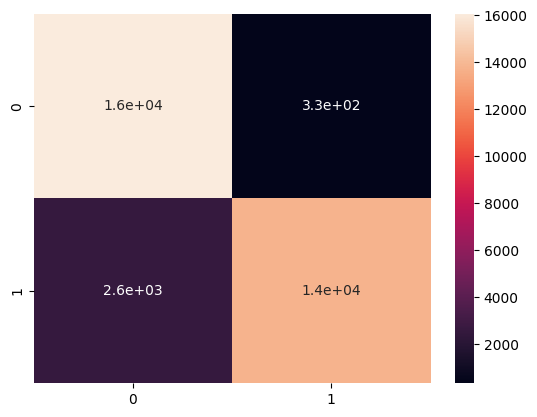

In [ ]:
cf = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf, annot=True)
plt.show()

# **Algorithm Decisiontree**

In [ ]:
modeldetree = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, random_state= 0)
modeldetree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_tree = modeldetree.predict(x_test)

# **Check model decisiontree**

In [ ]:
print(accuracy_score(y_test, y_pred_tree))

0.8780145736150492


In [ ]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     16407
           1       0.81      0.99      0.89     16392

    accuracy                           0.88     32799
   macro avg       0.90      0.88      0.88     32799
weighted avg       0.90      0.88      0.88     32799



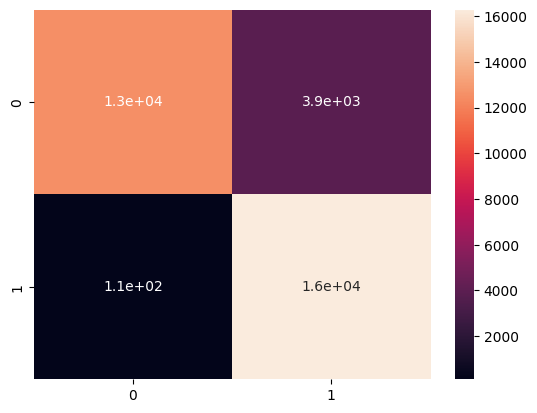

In [ ]:
cf1 = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf1, annot=True)
plt.show()

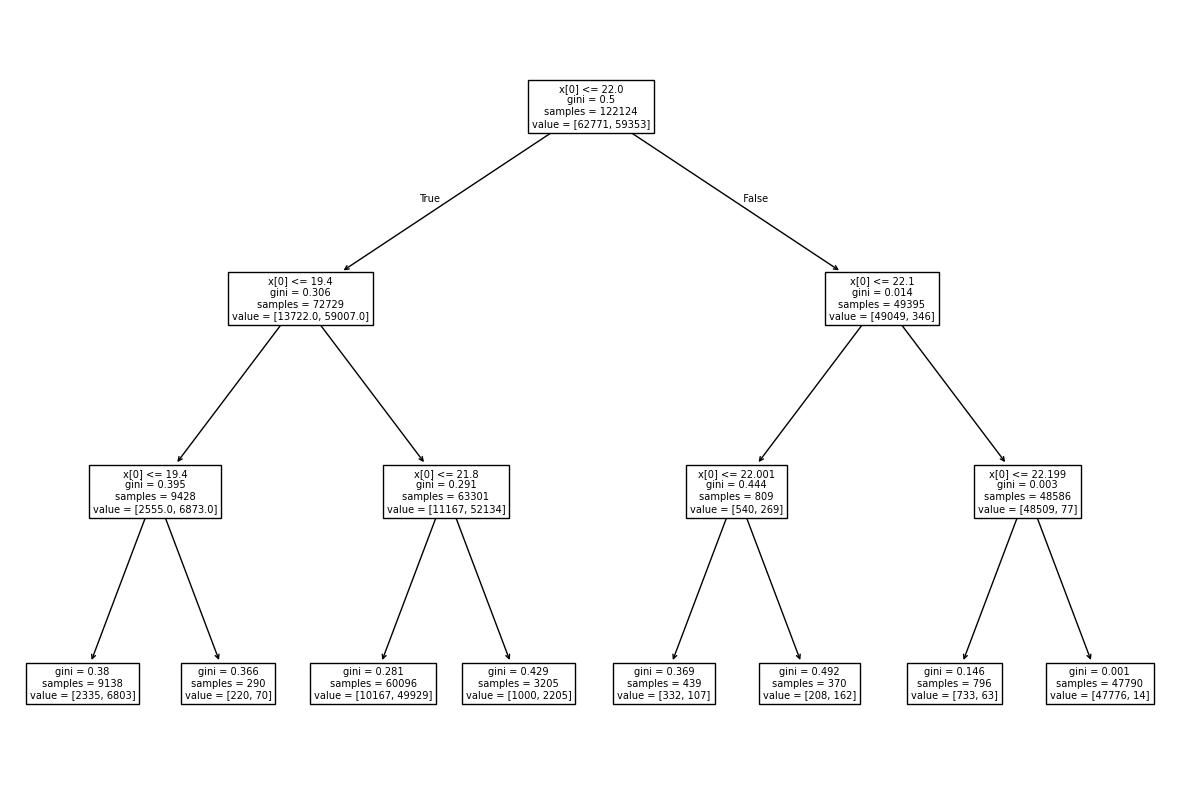

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(modeldetree)
plt.show()

# **Algorithm LogisticregRession**

In [ ]:
logreg = LogisticRegression(solver="liblinear")

In [ ]:
logreg.fit(x_train, y_train.ravel())

<ipython-input-236-1033bd68b3d4>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  logreg.fit(x_train, y_train.ravel())


LogisticRegression(solver='liblinear')

In [ ]:
y_pred_logreg = logreg.predict(x_test)

# **Check model logisticregression**

In [ ]:
print(accuracy_score(y_test, y_pred_tree))

0.8780145736150492


In [ ]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     16407
           1       0.81      0.99      0.89     16392

    accuracy                           0.88     32799
   macro avg       0.90      0.88      0.88     32799
weighted avg       0.90      0.88      0.88     32799



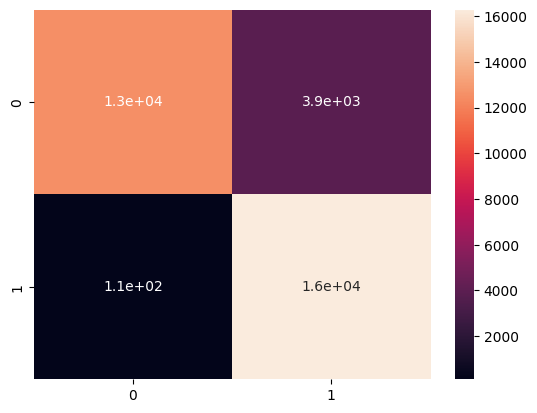

In [ ]:
cf1 = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf1, annot=True)
plt.show()